<a href="https://colab.research.google.com/github/joshimohitm9/Deep_Learning/blob/main/Customer_Churn_Prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [3]:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
a=pd.get_dummies(df, columns=["Geography","Gender"],drop_first=True)
df=a.astype("int")
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


In [11]:
x=df.drop("Exited",axis=1)
y=df["Exited"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [13]:
x_train.shape

(8000, 11)

In [14]:
from sklearn.preprocessing import StandardScaler
Scale=StandardScaler()
x_train_scaled=Scale.fit_transform(x_train)
x_test_scaled=Scale.transform(x_test)

In [15]:
x_train_scaled

array([[ 0.0862834 , -0.6601382 , -1.0446036 , ..., -0.58023704,
        -0.57542576, -1.09499335],
       [ 0.31430986, -0.75549256, -0.35146473, ...,  1.72343359,
        -0.57542576,  0.91324755],
       [-1.82084701,  0.57946842, -1.73774248, ..., -0.58023704,
        -0.57542576, -1.09499335],
       ...,
       [ 0.28321534,  1.53301197, -0.35146473, ...,  1.72343359,
        -0.57542576,  0.91324755],
       [-0.51487727,  0.198051  , -1.39117304, ..., -0.58023704,
        -0.57542576, -1.09499335],
       [-0.7325389 , -0.37407514,  1.72795189, ...,  1.72343359,
        -0.57542576,  0.91324755]])

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [17]:
model=Sequential()

model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [20]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 6s 14ms/step - loss: 0.5611 - accuracy: 0.7225 - val_loss: 0.4621 - val_accuracy: 0.8075
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4577 - accuracy: 0.7955 - val_loss: 0.4362 - val_accuracy: 0.8100
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4393 - accuracy: 0.8045 - val_loss: 0.4229 - val_accuracy: 0.8163
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4271 - accuracy: 0.8111 - val_loss: 0.4162 - val_accuracy: 0.8213
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4153 - accuracy: 0.8208 - val_loss: 0.4009 - val_accuracy: 0.8325
Epoch 6/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4008 - accuracy: 0.8338 - val_loss: 0.3892 - val_accuracy: 0.8388
Epoch 7/100
200/200 [==============================] - 2s 8ms/step - loss: 0.3865 - accuracy: 0.8425 - val_loss: 0.3786 - val_accuracy: 0.847

In [21]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [22]:
import numpy as np

In [23]:
y_pred=np.where(y_log > 0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [24]:
from sklearn.metrics import confusion_matrix , accuracy_score

In [25]:
accuracy_score(y_test,y_pred)

0.863

In [26]:
import matplotlib.pyplot as plt

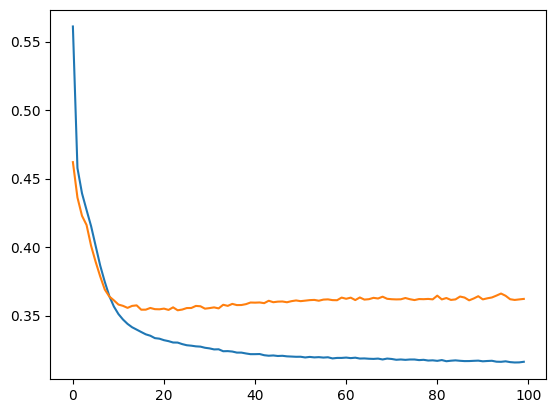

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

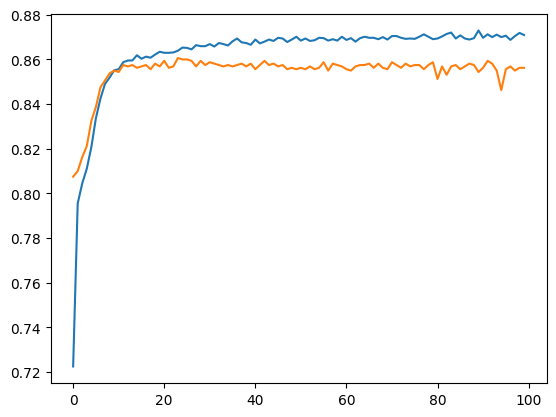

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])